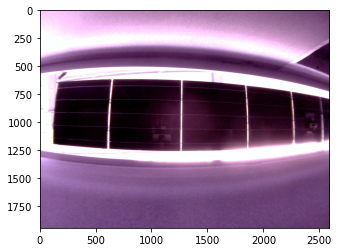

Original Dimensions :  (4192, 4192, 3)


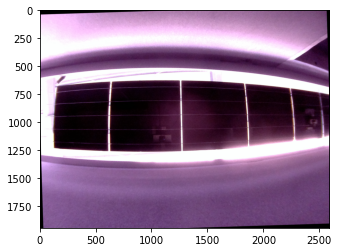

--- 1.0317120552062988 seconds for rotation ---


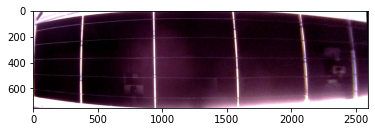

--- 2.2756989002227783 seconds for perspective---


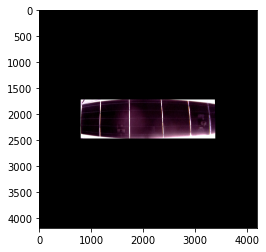

--- 4.480388164520264 seconds for perspective---


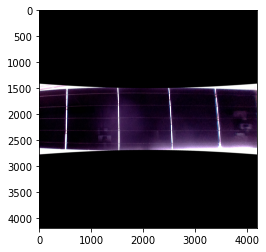

--- 17.21501111984253 seconds for fisheye---


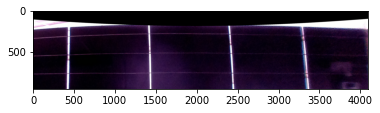

<Figure size 432x288 with 0 Axes>

In [35]:
from defisheye import Defisheye
import os
from PIL import Image
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import time

border = 800
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result
  
test_image = cv2.imread("testFisheye.png")
plt.imshow(test_image)
plt.show()

test_image = cv2.imread("testFisheye.png", cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



start_time = time.time()
result = rotate_image(test_image, 1.8)

plt.imshow(result)
plt.show()
print("--- %s seconds for rotation ---" % (time.time() - start_time))
cv2.imwrite("testFisheyeRotated.png", result)

# Locate points of the documents or object which you want to transform
pts1 = np.float32([[115, 580], [2592, 580], [115, 1320], [2592, 1320]])
pts2 = np.float32([[0, 0], [2592, -180], [0, 750], [2592, 960]])
  
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(result, matrix, (2592, 750))
plt.imshow(result)
plt.show()
cv2.imwrite("testFisheyeTransform.png", result)
print("--- %s seconds for perspective---" % (time.time() - start_time))

result = cv2.copyMakeBorder( result, 921+border, 921+border, border, border, cv2.BORDER_CONSTANT)
plt.imshow(result)
plt.show()
print("--- %s seconds for perspective---" % (time.time() - start_time))

cv2.imwrite("testFisheyeSquare.png", result)

img = "testFisheyeSquare.png"
img_out = "testFisheye_corrected.png"

dtype = 'linear'
format = 'fullframe'
fov = 179
pfov = 90
obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj.convert(img_out)

import matplotlib.image as mpimg
img = mpimg.imread(img_out)
imgplot = plt.imshow(img)
plt.show()
print("--- %s seconds for fisheye---" % (time.time() - start_time))

crop_img = img[1321:2271, 100:4992]
imgplot = plt.imshow(crop_img)
plt.show()
plt.savefig('cropped.png')

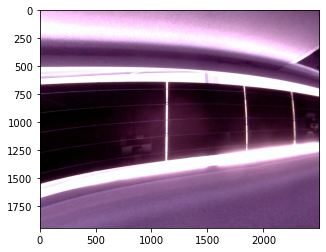

In [24]:
# You should replace these 3 lines with the output in calibration step
from matplotlib import pyplot as plt
import cv2 
import numpy as np 
DIM=(2500, 1944)
K=np.array([[2500.3524863867165, 100.0, 2500.7118000552183], [00.0, 10000.5071163774452, 500.3314451453386], [0.0, 0.0, 1.0]])
D=np.array([[-0.042595202508066574], [0.031307765215775184], [-0.04104704724832258], [.115343014605793324]])
def undistort(img_path):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    plt.imshow(undistorted_img)
    plt.show()
    
undistort("testFisheye.png")